### Import Packages

In [2]:
import requests
import pandas as pd
import geopandas as gpd
from IPython.display import display, IFrame
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import os

In [3]:
# Specify the URL of the webpage you want to display
url = "https://statsgeo.mycensus.gov.my/"

# Set the width and height of the iframe
width = "100%"
height = "400px"

# Embed the webpage within an iframe and display it
display(IFrame(url, width=width, height=height))

### Getting Response From Query link and Display

In [10]:
response = requests.get('https://maps.dosm.gov.my/dosm/rest/services/StatsGeo_asal/MapServer/1/query?f=json&where=KOD_NEGERI%3D%2712%27&returnGeometry=true&spatialRel=esriSpatialRelIntersects&outFields=*&outSR=102100')
geojson = response.text
geojson[0:1000]

'{"displayFieldName":"NEGERI","fieldAliases":{"OBJECTID":"FID","SHAPE_LENG":"SHAPE_LENG","Shape.STArea()":"Shape.STArea()","Shape.STLength()":"Shape.STLength()","NEGERI":"NEGERI","KOD_NEGERI":"KOD_NEGERI"},"geometryType":"esriGeometryPolygon","spatialReference":{"wkid":102100,"latestWkid":3857},"fields":[{"name":"OBJECTID","type":"esriFieldTypeOID","alias":"FID"},{"name":"SHAPE_LENG","type":"esriFieldTypeDouble","alias":"SHAPE_LENG"},{"name":"Shape.STArea()","type":"esriFieldTypeDouble","alias":"Shape.STArea()"},{"name":"Shape.STLength()","type":"esriFieldTypeDouble","alias":"Shape.STLength()"},{"name":"NEGERI","type":"esriFieldTypeString","alias":"NEGERI","length":17},{"name":"KOD_NEGERI","type":"esriFieldTypeString","alias":"KOD_NEGERI","length":2}],"features":[{"attributes":{"OBJECTID":10,"SHAPE_LENG":40.60858623,"Shape.STArea()":6.0523474054145039,"Shape.STLength()":40.608586224763968,"NEGERI":"SABAH","KOD_NEGERI":"12"},"geometry":{"rings":[[[12919079.548418211,663960.36792107776],

### Sample plot

<AxesSubplot:>

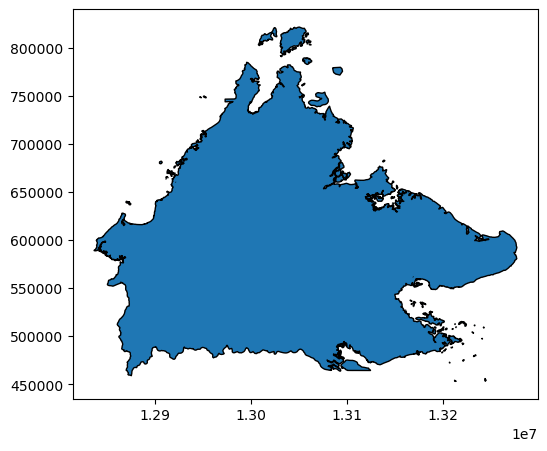

In [6]:
gdf = gpd.read_file(geojson)
gdf.plot(figsize =(6,6),edgecolor = 'black' )

### Reading Links CSV and Display

# Daerah

In [16]:
DAERAH_links_df = pd.read_csv('DAERAH_links.csv')
DAERAH_links_df

,Negeri Name,KOD_NEGERI,NGDP,Daerah Name,links
0,JOHOR,1,1,BATU PAHAT,https://maps.dosm.gov.my/dosm/rest/services/St...
1,JOHOR,1,2,JOHOR BAHRU,https://maps.dosm.gov.my/dosm/rest/services/St...
2,JOHOR,1,3,KLUANG,https://maps.dosm.gov.my/dosm/rest/services/St...
3,JOHOR,1,4,KOTA TINGGI,https://maps.dosm.gov.my/dosm/rest/services/St...
4,JOHOR,1,5,MERSING,https://maps.dosm.gov.my/dosm/rest/services/St...
...,...,...,...,...,...
139,SARAWAK,13,30,SARAWAK30,https://maps.dosm.gov.my/dosm/rest/services/St...
140,SARAWAK,13,31,SARAWAK31,https://maps.dosm.gov.my/dosm/rest/services/St...
141,W.P. KUALA LUMPUR,14,1,W.P. KUALA LUMPUR01,https://maps.dosm.gov.my/dosm/rest/services/St...
142,W.P. LABUAN,15,1,W.P. LABUAN01,https://maps.dosm.gov.my/dosm/rest/services/St...


### Loop on links and download geometry

In [ ]:
DAERAH_links = DAERAH_links_df['links']
filename = 1

for link in links:
    response = requests.get(link)
    geojson = response.text
    gdft = gpd.read_file(geojson)
    path = f'./DAERAH/{filename}.geojson'
    gdft.to_file(path, driver='GeoJSON')
    filename+=1

## Merge all polygons into one geojson

In [ ]:
# Create an empty GeoDataFrame
merged_gdf = gpd.GeoDataFrame()

# Directory containing the GeoJSON files
directory_path = './DAERAH/'  # Replace with the path to your directory

# Loop through the files and merge
for filename in os.listdir(directory_path):
    if filename.endswith('.geojson'):
        file_path = os.path.join(directory_path, filename)
        try:
            gdf = gpd.read_file(file_path)
            merged_gdf = pd.concat([merged_gdf, gdf], ignore_index=True)
        except Exception as e:
            print(f"Error reading {file_path}: {str(e)}")

# Save the merged GeoDataFrame to a new GeoJSON file
output_path = './DAERAH/DAERAH.geojson'  # Replace with the desired output file path
merged_gdf.to_file(output_path, driver='GeoJSON')

# Final Daerah Data

In [13]:
Daerah = gpd.read_file("Daerah.geojson")
Daerah

,OBJECTID,NEGERI,DAERAH,NGDP,Shape.STArea(),Shape.STLength(),geometry
0,25,SABAH,PITAS,1215,0.122214,2.346232,"MULTIPOLYGON (((13040685.447 782406.089, 13040..."
1,20,SABAH,TUARAN,1210,0.093049,2.214650,"POLYGON ((12945220.916 702738.594, 12945197.89..."
2,44,KELANTAN,TANAH MERAH,0306,0.071435,1.457583,"POLYGON ((11358440.323 657517.179, 11358698.84..."
3,24,SABAH,KOTA MARUDU,1214,0.143218,2.355631,"POLYGON ((12983413.388 746834.878, 12983654.84..."
4,92,SARAWAK,BINTULU,1319,0.594815,5.023197,"POLYGON ((12635558.984 400354.114, 12635526.01..."
...,...,...,...,...,...,...,...
139,46,KELANTAN,GUA MUSANG,0308,0.672195,5.496505,"POLYGON ((11325995.548 606389.889, 11331448.91..."
140,95,SARAWAK,SONG,1322,0.312016,3.766913,"POLYGON ((12534646.678 243001.092, 12534751.97..."
141,110,PERAK,KUALA KANGSAR,0805,0.209064,2.779754,"POLYGON ((11255066.163 564883.526, 11255310.45..."
142,51,MELAKA,JASIN,0402,0.055373,1.600017,"POLYGON ((11401229.334 274997.074, 11402544.72..."


In [26]:
# Function to count polygons within a geometry
def count_polygons(geometry):
    if geometry.geom_type == 'Polygon':
        return 1
    elif geometry.geom_type == 'MultiPolygon':
        return len(geometry.geoms)
    else:
        return 0

# Count polygons in each GeoDataFrame
count_merged = sum(Daerah['geometry'].apply(count_polygons))

print(f"Total extracted polygons in Daerah: {count_merged}")

Total extracted polygons in Daerah: 438


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


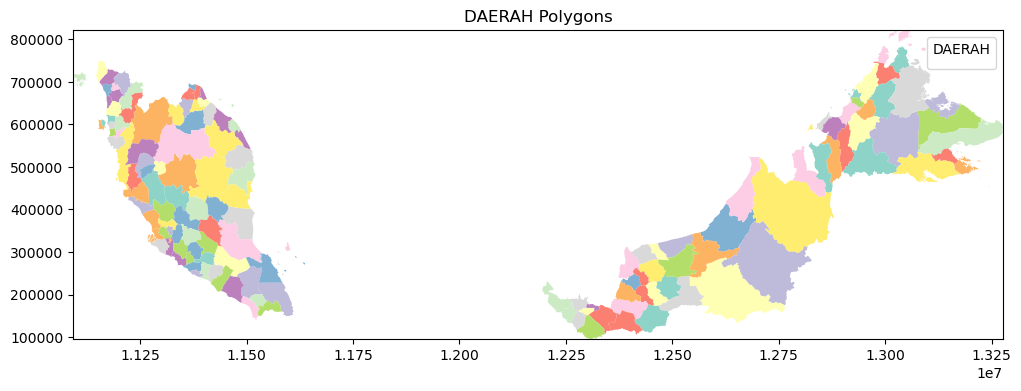

In [25]:
# Create a colormap with unique colors for each unique 'DAERAH' type
unique_daerah_types = Daerah['DAERAH'].unique()
colors = sns.color_palette('Set3', len(unique_daerah_types))
colormap = dict(zip(unique_daerah_types, colors))

# Plot the GeoDataFrame with different colors for each 'DAERAH' type
fig, ax = plt.subplots(figsize=(12, 12))

for daerah_type, color in colormap.items():
    Daerah[Daerah['DAERAH'] == daerah_type].plot(ax=ax, color=color, label=daerah_type)

# Set axis limits
ax.set_xlim(Daerah.total_bounds[0], Daerah.total_bounds[2])
ax.set_ylim(Daerah.total_bounds[1], Daerah.total_bounds[3])

# Add a legend
ax.legend(title='DAERAH', loc='upper right')

# Show the plot
plt.title('DAERAH Polygons')
plt.show()

# Negeri

In [27]:
Negeri_links_df = pd.read_csv('NEGERI_links.csv')
Negeri_links_df

,KOD_NEGERI,Negeri Name,Link,Serial_no,Unnamed: 4,Unnamed: 5
0,1,JOHOR,https://maps.dosm.gov.my/dosm/rest/services/St...,1,['https://maps.dosm.gov.my/dosm/rest/services/...,['https://maps.dosm.gov.my/dosm/rest/services/...
1,2,KEDAH,https://maps.dosm.gov.my/dosm/rest/services/St...,2,'https://maps.dosm.gov.my/dosm/rest/services/S...,['https://maps.dosm.gov.my/dosm/rest/services/...
2,3,KELANTAN,https://maps.dosm.gov.my/dosm/rest/services/St...,3,'https://maps.dosm.gov.my/dosm/rest/services/S...,['https://maps.dosm.gov.my/dosm/rest/services/...
3,4,MELAKA,https://maps.dosm.gov.my/dosm/rest/services/St...,4,'https://maps.dosm.gov.my/dosm/rest/services/S...,['https://maps.dosm.gov.my/dosm/rest/services/...
4,5,NEGERI SEMBILAN,https://maps.dosm.gov.my/dosm/rest/services/St...,5,'https://maps.dosm.gov.my/dosm/rest/services/S...,['https://maps.dosm.gov.my/dosm/rest/services/...
5,6,PAHANG,https://maps.dosm.gov.my/dosm/rest/services/St...,6,'https://maps.dosm.gov.my/dosm/rest/services/S...,['https://maps.dosm.gov.my/dosm/rest/services/...
6,7,PULAU PINANG,https://maps.dosm.gov.my/dosm/rest/services/St...,7,'https://maps.dosm.gov.my/dosm/rest/services/S...,['https://maps.dosm.gov.my/dosm/rest/services/...
7,8,PERAK,https://maps.dosm.gov.my/dosm/rest/services/St...,8,'https://maps.dosm.gov.my/dosm/rest/services/S...,['https://maps.dosm.gov.my/dosm/rest/services/...
8,9,PERLIS,https://maps.dosm.gov.my/dosm/rest/services/St...,9,'https://maps.dosm.gov.my/dosm/rest/services/S...,['https://maps.dosm.gov.my/dosm/rest/services/...
9,10,SELANGOR,https://maps.dosm.gov.my/dosm/rest/services/St...,10,'https://maps.dosm.gov.my/dosm/rest/services/S...,['https://maps.dosm.gov.my/dosm/rest/services/...


In [ ]:
Negeri_links = Negeri_links_df['links']
filename = 1

for link in links:
    response = requests.get(link)
    geojson = response.text
    gdft = gpd.read_file(geojson)
    path = f'./Negeri/{filename}.geojson'
    gdft.to_file(path, driver='GeoJSON')
    filename+=1

## Merge all polygons into one geojson

In [ ]:

# Create an empty GeoDataFrame
merged_gdf = gpd.GeoDataFrame()

# Directory containing the GeoJSON files
directory_path = './Negeri/'  # Replace with the path to your directory

# Loop through the files and merge
for filename in os.listdir(directory_path):
    if filename.endswith('.geojson'):
        file_path = os.path.join(directory_path, filename)
        try:
            gdf = gpd.read_file(file_path)
            merged_gdf = pd.concat([merged_gdf, gdf], ignore_index=True)
        except Exception as e:
            print(f"Error reading {file_path}: {str(e)}")

# Save the merged GeoDataFrame to a new GeoJSON file
output_path = './Negeri/Negeri.geojson'  # Replace with the desired output file path
merged_gdf.to_file(output_path, driver='GeoJSON')

# Final Negeri Data

In [29]:
Negeri = gpd.read_file("Negeri.geojson")
Negeri

,OBJECTID,NEGERI,KOD_NEGERI,SHAPE_LENG,Shape.STArea(),Shape.STLength(),geometry
0,5,JOHOR,01,8.760588,1.556689,8.760588,"MULTIPOLYGON (((11458682.033 293506.631, 11462..."
1,7,PERAK,08,10.272074,1.709669,10.272074,"MULTIPOLYGON (((11306000.040 663328.827, 11306..."
2,12,NEGERI SEMBILAN,05,3.882622,0.543482,3.882622,"POLYGON ((11349783.433 364740.883, 11349915.93..."
3,11,KEDAH,02,8.719832,0.772855,8.719832,"MULTIPOLYGON (((11174487.912 729699.947, 11174..."
4,4,PULAU PINANG,07,2.510193,0.085199,2.510193,"MULTIPOLYGON (((11173832.018 622304.766, 11173..."
5,3,KELANTAN,03,7.662504,1.233914,7.662504,"POLYGON ((11371353.102 692044.012, 11371379.80..."
6,14,MELAKA,04,2.209190,0.133928,2.209190,"MULTIPOLYGON (((11377154.019 276267.627, 11377..."
7,10,SABAH,12,40.608586,6.052347,40.608586,"MULTIPOLYGON (((12919079.548 663960.368, 12919..."
8,2,W.P. LABUAN,15,0.735648,0.007485,0.735648,"MULTIPOLYGON (((12829644.022 600621.211, 12829..."
9,16,W.P. PUTRAJAYA,16,0.387527,0.004011,0.387527,"POLYGON ((11321191.656 330977.265, 11321163.68..."


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


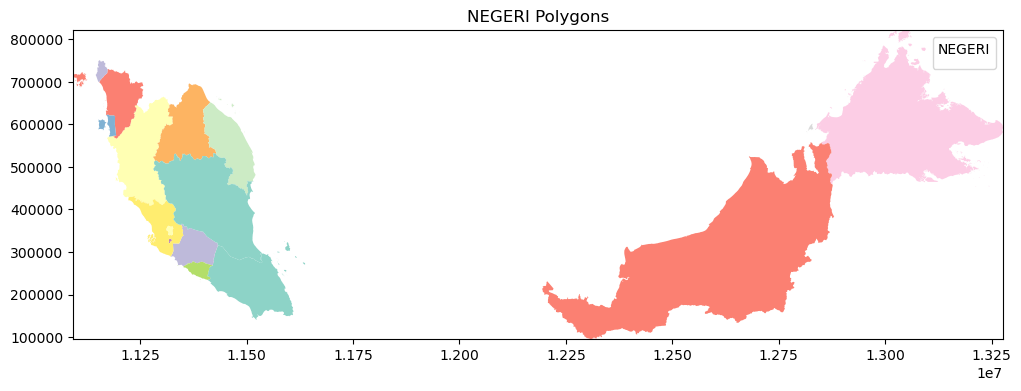

In [31]:
# Create a colormap with unique colors for each unique 'NEGERI' type
unique_negeri_types = Negeri['NEGERI'].unique()
colors = sns.color_palette('Set3', len(unique_negeri_types))
colormap = dict(zip(unique_negeri_types, colors))

# Plot the GeoDataFrame with different colors for each 'NEGERI' type
fig, ax = plt.subplots(figsize=(12, 12))

for negeri_type, color in colormap.items():
    Negeri[Negeri['NEGERI'] == negeri_type].plot(ax=ax, color=color, label=negeri_type)

# Set axis limits
ax.set_xlim(Negeri.total_bounds[0], Negeri.total_bounds[2])
ax.set_ylim(Negeri.total_bounds[1], Negeri.total_bounds[3])

# Add a legend
ax.legend(title='NEGERI', loc='upper right')

# Show the plot
plt.title('NEGERI Polygons')
plt.show()

In [32]:
# Function to count polygons within a geometry
def count_polygons(geometry):
    if geometry.geom_type == 'Polygon':
        return 1
    elif geometry.geom_type == 'MultiPolygon':
        return len(geometry.geoms)
    else:
        return 0

# Count polygons in each GeoDataFrame
count_merged = sum(Negeri['geometry'].apply(count_polygons))

print(f"Total extracted polygons in Negeri: {count_merged}")

Total extracted polygons in Negeri: 312


In [25]:
# Function to count polygons within a geometry
def count_polygons(geometry):
    if geometry.geom_type == 'Polygon':
        return 1
    elif geometry.geom_type == 'MultiPolygon':
        return len(geometry.geoms)
    else:
        return 0

# Count polygons in each GeoDataFrame
count_daerah = sum(Daerah['geometry'].apply(count_polygons))
count_negeri = sum(Negeri['geometry'].apply(count_polygons))

# Total polygons in both GeoDataFrames
total_polygons = count_daerah + count_negeri

print(f"Total number of polygons in Daerah GeoDataFrame: {count_daerah}")
print(f"Total number of polygons in Negeri GeoDataFrame: {count_negeri}")
print(f"Total number of polygons in both GeoDataFrames: {total_polygons}")

Total number of polygons in Daerah GeoDataFrame: 438
Total number of polygons in Negeri GeoDataFrame: 312
Total number of polygons in both GeoDataFrames: 750
